## Clase 9: Gramianos de controlabilidad y observabilidad

Los tests de controlabilidad y observabilidad nos alcanzan para confirmar si un sistema es controlable y observable. Sin embargo, no nos indican qué tan fácil es controlar u observar el sistema. Para esto podemos utilizar los gramianos, y para más adelante tener como herramienta para establecer reducciones de órden de modelos con ese criterio.

Dado un sistema LTI MIMO tal que:

$$ \dot{x} = A x + B u $$

El gramiano de controlabilidad es:

$$ G_C(t_0, t_1) = \int_{t_0}^{t_1} e^{A\left(t_0 - \tau\right)}B B^T e^{A^T \left(t_0 - \tau\right)} d\tau$$ 

Que es una matriz simétrica y semidefinida positiva. Decimos que:

El sistema dado es controlable en el intervalo $[t_0, t_1]$ si y solo si:

$$ |G_C(t_0, t_1)| \neq 0  \, \forall t \in [t_0, t_1]$$ 

Si este sistema tiene ecuación de salida dada por:

$$ y = C x + D u $$

El gramiano de observabilidad es:

$$ G_O(t_0, t_1) = \int_{t_0}^{t_1} e^{A^T \left(\tau - t_0\right)}C^T C e^{A\left(\tau - t_0\right)} d\tau$$ 

Que es una matriz simétrica y semidefinida positiva. Decimos que:

El sistema dado es observable en el intervalo $[t_0, t_1]$ si y solo si:

$$ |G_O(t_0, t_1)| \neq 0  \, \forall t \in [t_0, t_1]$$ 

Volvamos al ejercicio resuelto la clase pasada y repitamos aplicando el gramiano de controlabilidad:

**Ejercicio 7:**

<figure>
<center>
<img src='https://drive.google.com/uc?id=1AWb_mm--HrIPDPQ-4vGigO235uCuOYxG'/>
<figcaption> Ejercicio 7 </figcaption></center>
</figure>

Su ecuación de estado era:

$$ \begin{bmatrix}\dot{v_1} \\ \dot{v_2} \end{bmatrix} = \begin{bmatrix}-\frac{1}{R_1 C_1} & 0 \\ 0 & -\frac{1}{R_2 C_2} \end{bmatrix}\begin{bmatrix}v_1 \\ v_2 \end{bmatrix}+ \begin{bmatrix}\frac{1}{R_1 C_1} \\ \frac{1}{R_2 C_2} \end{bmatrix} v(t) $$

y la de salida:

$$ y = \begin{bmatrix}1 & 1\end{bmatrix} \begin{bmatrix}v_1 \\ v_2 \end{bmatrix}$$ 

Tomemos algunos valores numéricos para particularizar el cálculo:

* $R_1 = 950\Omega$  
* $R_2 = 1{,}05~\text{k}\Omega$  
* $C_1 = 1{,}1~\mu\text{F}$  
* $C_2 = 1~\mu\text{F}$

Dado que $t_0 = 0$ s y $t_1 = t$, el gramiano de controlabilidad queda:

$$ G_C(t) = \int_0^t e^{-A\tau}B B^T e^{-A^T\tau} d\tau$$ 

Empezamos utizando el test de controlabilidad que ya conocemos:

In [5]:
!pip install slycot
!pip install control==0.8.4 # Some functions not working with 0.9.0
import numpy as np
import control as ctrl
import scipy as sp
import sympy as symb
import matplotlib.pyplot as plt

R1 = 950
R2 = 1050
C1 = 1.1e-6
C2 = 1e-6
A = np.array([[-1/R1/C1, 0], [0, -1/R2/C2]])
B = np.array([[1/R1/C1], [1/R2/C2]])
C = np.array([1, 1])
D = 0
t_final = 0.01

sys = ctrl.StateSpace(A, B, C, D)

P = ctrl.ctrb(A, B)
print('\n P =')
print(P)

print('El rango de P es', np.linalg.matrix_rank(P), 'entonces es controlable')



 P =
[[    956.93779904 -915729.95123738]
 [    952.38095238 -907029.47845805]]
El rango de P es 2 entonces es controlable


Nos dice que el sistema es controlable. Evaluemos ahora el gramiano de controlabilidad para $t_1 = 0{,}01$.

La cuenta da:

$$ G_C(t) = \begin{bmatrix}\frac{e^{\left(\frac{2 t}{R_1 C_1} \right)} - 1}{2 R_1 C_1} & \frac{e^{\left[t \left(\frac{1}{R_1 C_1}+\frac{1}{R_2 C_2}\right)\right]} - 1}{R_1 C_1 + R_2 C_2} \\ \frac{e^{\left[t \left(\frac{1}{R_1 C_1}+\frac{1}{R_2 C_2}\right)\right]} - 1}{R_1 C_1 + R_2 C_2} & \frac{e^{\left(\frac{2 t}{R_2 C_2}\right)} - 1}{2 R_2 C_2} \end{bmatrix} $$

**Ejercicio** Llegar a la expresión anterior a partir de la integral dada y la definición del sistema.

A continuación, evaluamos en $t_1$ en base a la expresión hallada y verificamos que el determinante sea no nulo:

In [6]:
gc11 = (np.exp(2*t_final/(R1*C1))-1)/(2*R1*C1)
gc22 = (np.exp(2*t_final/(R2*C2))-1)/(2*R2*C2)
gc12 = (np.exp(t_final*(1/(R1*C1)+1/(R2*C2)))-1)/(R1*C1+R2*C2)
gc21 = gc12
Gc = np.matrix([[gc11, gc12],[gc21, gc22]])
print('El determinante de Gc es')
print(np.linalg.det(Gc))

El determinante de Gc es
4.9812405978168744e+16


De la demostración de condición de suficiencia del teorema para el test de controlabilidad con gramiano, se propone una entrada u(t) que nos permite llevar al estado de $x_0 = x(t_0)$ a $x_1 = x(t_1) = 0$ cuyo valor es:

$$ u(t) = -B^T e^{A^T (t_0 - t)} G_C^{-1}(t_0, t_1) x_0 $$

Calculemos entonces para nuestro circuito, cuál es la entrada que nos permite llevar de:

* $v_1(0) = 10$ V, 
* $v_2(0) = -3$ V 

a 

* $v_1(0{,}01) = 0$ V, 
* $v_2(0,01) = 0$ V.

Es decir:

$$ u(t) = -B^T e^{-t A^T} G_C^{-1}(0, 0.01) \begin{bmatrix} 10\\ -3\end{bmatrix} $$

Dimulemos el sistema con dicha entrada para validar que cumple el objetivo propuesto.

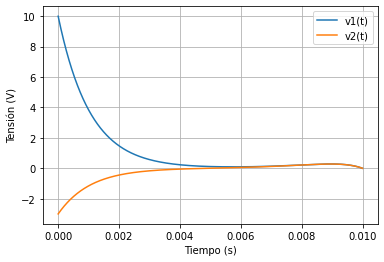

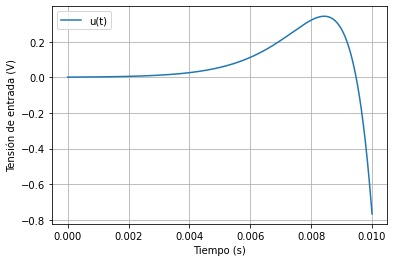

In [7]:
x0 = np.array([[10], [-3]])

def u_to_origin(tiempo):
    u = -B.transpose() @ sp.linalg.expm(-tiempo*A) @ np.linalg.inv(Gc) @ x0
    return u.item()

t_inicial = 0
paso_tiempo = t_final/10000  # Ajustar este tiempo
tiempo = np.arange(t_inicial, t_final, paso_tiempo)
u = np.array([u_to_origin(t) for t in tiempo])
tout, yout, xout = ctrl.forced_response(sys, tiempo, u, X0=[10, -3])
plt.plot(tout, xout[0], label='v1(t)')
plt.plot(tout, xout[1], label='v2(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Tensión (V)')
plt.legend(loc='best')
plt.grid()
plt.show()
plt.figure()
plt.plot(tout, u, label='u(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Tensión de entrada (V)')
plt.legend()
plt.grid()
plt.show() 

Vemos que se logra el objetivo de alcanzar $x = 0$ en el tiempo especificado con la entrada de control calculada.

Podemos utilizar directo la herramienta de simulación para calcular un gramiano del sistema que es equivalente:

In [8]:
Gc = ctrl.gram(sys, 'c')
print('Gc =')
print(Gc)
print('El determinante de Gc es:')
print(np.linalg.det(Gc))

Gc =
[[478.46889952 477.32696897]
 [477.32696897 476.19047619]]
El determinante de Gc es:
1.2977958265440566


## Tarea

**Ejercicio 1:**

1. Repetir las simulaciones del circuito RC para $t_1 = 0.001$ s.
2. Repetir las simulaciones del circuito RC para $t_1 = 0.1$ s.
3. ¿Qué conclusiones podés sacar sobre los puntos 1 y 2? ¿Qué esperarías que pase cuando $t \to \infty$? 
4. Calcular el grammiano de observabilidad para $t_1 = 0.01$ s y verificar que es observable. Repetir usando la función gram().

**Ejercicio 2:** 

¿Puede detectar si el sistema de las siguientes ecuaciones es controlable u observable sin utilizar el test de controlabilidad y observabilidad? En caso de pérdida de controlabilidad u observabilidad, indique el o los modos que producen esta(s) pérdida(s).

$$
\dot{x}(t)  = \left[\begin{array}{rrrrrrr}
                        2 & 1 & 0 & 0 & 0 & 0 & 0 \\
                        0 & 2 & 0 & 0 & 0 & 0 & 0 \\
                        0 & 0 & 2 & 0 & 0 & 0 & 0 \\
                        0 & 0 & 0 & 2 & 0 & 0 & 0 \\
                        0 & 0 & 0 & 0 & 3 & 1 & 0 \\
                        0 & 0 & 0 & 0 & 0 & 3 & 0 \\
                        0 & 0 & 0 & 0 & 0 & 0 & 3 \\
                   \end{array}\right] x(t) + \left[\begin{array}{rrr}
                                                        2 & 1 & 0 \\
                                                        2 & 1 & 1 \\
                                                        1 & 1 & 1 \\
                                                        3 & 2 & 1 \\
                                                        1 & 0 & 0 \\
                                                        1 & 0 & -1 \\
                                                        -1 & 0 & 1 \\
                                                    \end{array}\right] u(t) 
                                                    \\
y(t) = \left[\begin{array}{rrrrrrr}
                2 & 2 & 1 & 3 & -1 & 1 & 1 \\
                1 & 1 & 1 & 2 & 0 & 0 & 0 \\
                0 & 1 & 1 & 1 & 1 & 1 & 0 \\
               \end{array}\right] x(t)
$$

Analizar primero y luego verificar por computadora.
